# Causes of Death in European Countries | EDA & Visualisations

This Explorary Data Analysis seeks to analyse and visualise the life expectancies and the most common causes of death in European countries. I am interested in focusing on Europe, as this is where I live. This project gave me the opportunity to practice explorary data analysis skills and learn how to make choropleth maps.

#### Dataset: 
The data used in this analysis was taken from kaggle https://www.kaggle.com/datasets/adamsmith852/life-expectancy-data-gho. 

The dataset was compiled from the Global Health Observatory (GHO), the public health data repository established by the World Health Organisation (WHO). The dataset includes the life expectancy at birth and estimated number of deaths for a large number of different causes for males and females from 183 countries, from four years (2000, 2010, 2015 and 2019). The estimated number of deaths is recorded as number per 1000 people in the population. BMI and alcohol consumption were also included in the dataset, however, I chose not to focus these and dropped them from the analysis. I analysed the data from just the European countries.

#### Analysis Questions:
* What were the average life expectancies in Europe for men and women, and how have they changed over this time period?
* Which European countries had the lowest and highest life expectancies in this time period?
* What are the most common causes of death in Europe? How does this differ between men and women?
* How does the death rate from different causes of death differ between European countries? Has this changed over time?

In [1]:
# Importing in the libaries
import pandas as pd
import numpy as np
import json
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the csv file
df = pd.read_csv('Life Expectancy Data.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Inserting a new column into the df for Region, and setting the Region for these countries as Europe
df.insert(1, "Region", None)

europe = [
    'Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
    'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia',
    'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Republic of Moldova', 'Monaco', 'Montenegro',
    'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania',
    'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'
]

df.loc[df['Country'].isin(europe), 'Region'] = 'Europe'

In [4]:
# Making a new df with just the data from European countries
europe_df = df[df['Region'] == 'Europe']
europe_df.head(1)

,Country,Region,Year,Gender,Life Expectancy at birth,BMI,Alcohol,Tuberculosis,Syphilis,Chlamydia,Gonorrhoea,Trichomoniasis,Genital herpes,Other STDs,HIV/AIDS,Diarrhoeal diseases,Whooping cough,Diphtheria,Measles,Tetanus,Meningitis,Encephalitis,Acute hepatitis A,Acute hepatitis B,Acute hepatitis C,Acute hepatitis E,Malaria,African Trypanosomiasis,Chagas disease,Schistosomiasis,Leishmaniasis,lymphatic filariasis,Onchocerciasis,Cysticercosis,Echinococcosis,Dengue,Trachoma,Yellow fever,Rabies,Ascariasis,Trichuriasis,Hookworm disease,Food-bourne trematodes,Leprosy,Lower respiratory infections,Upper respiratory infections,Otitis media,Preterm birth complications,Birth asphyxia and birth trauma,Neonatal sepsis and infections,Other neonatal conditions,Protein-energy malnutrition,Iodine deficiency,Vitamin A deficiency,Iron-deficiency anaemia,Other nutritional deficiencies,Mouth and oropharynx cancers,Oesophagus cancer,Stomach cancer,Colon and rectum cancers,Liver cancer,Pancreas cancer,"Trachea, bronchus, lung cancers",Malignant skin melanoma,Non-melanoma skin cancer,Breast cancer,Cervix uteri cancer,Corpus uteri cancer,Ovary cancer,Prostate cancer,Testicular cancer,Kidney cancer,Bladder cancer,Brain and nervous system cancers,Gallbladder and biliary tract cancer,Larynx cancer,Thyroid cancer,Hodgkin lymphoma,Non-Hodgkin lymphoma,Multiple myeloma,Leukaemia,Diabetes mellitus,"Endocrine, blood, immune disorders",Depressive disorders,Bipolar disorder,Schizophrenia,Alcohol use disorders,Drug use disorders,Anxiety disorders,Eating disorders,Autism and Asperger syndrome,Childhood behavioural disorders,Idiopathic intellectual disability,Alzheimer disease and other dementias,Parkinson disease,Epilepsy,Multiple sclerosis,Migraine,Non-migraine headache,Other neurological conditions,Sense organ diseases,Rheumatic heart disease,Hypertensive heart disease,Ischaemic heart disease,Stroke,"Cardiomyopathy, myocarditis, endocarditis",Other circulatory diseases,Chronic obstructive pulmonary disease,Asthma,Peptic ulcer disease,Cirrhosis of the liver,Appendicitis,Gastritis and duodenitis,Paralytic ileus and intestinal obstruction,Inflammatory bowel disease,Gallbladder and biliary diseases,Pancreatitis,Kidney diseases,Benign prostatic hyperplasia,Urolithiasis,Other urinary diseases,Infertility,Gynecological diseases,Skin diseases,Rheumatoid arthritis,Osteoarthritis,Gout,Back and neck pain,Other musculoskeletal disorders,Neural tube defects,Cleft lip and cleft palate,Down syndrome,Congenital heart anomalies,Other chromosomal anomalies,Other congenital anomalies,Oral conditions,Sudden infant death syndrome,Road injury,Poisonings,Falls,"Fire, heat and hot substances",Drowning,Exposure to mechanical forces,Natural disasters,Other unintentional injuries,Self-harm,Interpersonal violence,Collective violence and legal intervention
8,Albania,Europe,2019,Male,76.25,NaN,11.02,0.005686,0.000397,0.0,0.000013,0,0,0.000007,0.024,0.003797,0.000341,0.000011,0.000068,0.001563,0.007384,0.010655,0.000027,0.000352,0.000066,0.000013,0.0,0.0,0.0,0.0,0.000555,0.0,0.0,0.0,0.000002,0.0,0.0,0.0,1.410000e-07,0.0,0.0,0.0,0,0.0,0.290989,0.006114,0.000025,0.060151,0.018234,0.005577,0.009315,0.001104,0.0,0.0,0.0,0.000471,0.057891,0.043831,0.356616,0.116623,0.264624,0.163591,0.866585,0.012966,0.027114,0.0,0.0,0.0,0.0,0.310725,0.008727,0.09073,0.263893,0.154559,0.007391,0.08037,0.005066,0.010511,0.018773,0.020088,0.077679,0.089746,0.045726,0,0.0,0.0,0.013334,0.018252,0.0,2.960000e-07,0,0,0.0,0.505758,0.186713,0.020833,0.01992,0.0,0.0,0.035218,0.0,0.019573,0.157327,4.023249,3.449557,0.224604,0.413641,0.477476,0.124507,0.021983,0.221669,0.002051,0.000851,0.014192,0.005198,0.011101,0.017187,0.19924,0.0,0.000396,0.02523,0.0,0.0,0.002796,0.005165,0.0,0.0,0.0,0.005866,0.003925,0.000016,0.001066,0.03357,0.002829,0.015076,0.0,0.001,0.258881,0.005705,0.064579,0.008443,0.019981,0.034043,0.033273,0.070418,0.087084,0.072844,0.000188


### Data cleaning
* Checking for null values
* Dropping columns that are not needed for the analysis

In [5]:
# Checking for null values
europe_df.isnull().sum()

Country                                        0
Region                                         0
Year                                           0
Gender                                         0
Life Expectancy at birth                       8
BMI                                           84
Alcohol                                        4
Tuberculosis                                   0
Syphilis                                       0
Chlamydia                                      0
Gonorrhoea                                     0
Trichomoniasis                                 0
Genital herpes                                 0
Other STDs                                     0
HIV/AIDS                                       0
Diarrhoeal diseases                            0
Whooping cough                                 0
Diphtheria                                     0
Measles                                        0
Tetanus                                        0
Meningitis          

In [6]:
europe_df[europe_df['Life Expectancy at birth'].isnull()]

,Country,Region,Year,Gender,Life Expectancy at birth,BMI,Alcohol,Tuberculosis,Syphilis,Chlamydia,Gonorrhoea,Trichomoniasis,Genital herpes,Other STDs,HIV/AIDS,Diarrhoeal diseases,Whooping cough,Diphtheria,Measles,Tetanus,Meningitis,Encephalitis,Acute hepatitis A,Acute hepatitis B,Acute hepatitis C,Acute hepatitis E,Malaria,African Trypanosomiasis,Chagas disease,Schistosomiasis,Leishmaniasis,lymphatic filariasis,Onchocerciasis,Cysticercosis,Echinococcosis,Dengue,Trachoma,Yellow fever,Rabies,Ascariasis,Trichuriasis,Hookworm disease,Food-bourne trematodes,Leprosy,Lower respiratory infections,Upper respiratory infections,Otitis media,Preterm birth complications,Birth asphyxia and birth trauma,Neonatal sepsis and infections,Other neonatal conditions,Protein-energy malnutrition,Iodine deficiency,Vitamin A deficiency,Iron-deficiency anaemia,Other nutritional deficiencies,Mouth and oropharynx cancers,Oesophagus cancer,Stomach cancer,Colon and rectum cancers,Liver cancer,Pancreas cancer,"Trachea, bronchus, lung cancers",Malignant skin melanoma,Non-melanoma skin cancer,Breast cancer,Cervix uteri cancer,Corpus uteri cancer,Ovary cancer,Prostate cancer,Testicular cancer,Kidney cancer,Bladder cancer,Brain and nervous system cancers,Gallbladder and biliary tract cancer,Larynx cancer,Thyroid cancer,Hodgkin lymphoma,Non-Hodgkin lymphoma,Multiple myeloma,Leukaemia,Diabetes mellitus,"Endocrine, blood, immune disorders",Depressive disorders,Bipolar disorder,Schizophrenia,Alcohol use disorders,Drug use disorders,Anxiety disorders,Eating disorders,Autism and Asperger syndrome,Childhood behavioural disorders,Idiopathic intellectual disability,Alzheimer disease and other dementias,Parkinson disease,Epilepsy,Multiple sclerosis,Migraine,Non-migraine headache,Other neurological conditions,Sense organ diseases,Rheumatic heart disease,Hypertensive heart disease,Ischaemic heart disease,Stroke,"Cardiomyopathy, myocarditis, endocarditis",Other circulatory diseases,Chronic obstructive pulmonary disease,Asthma,Peptic ulcer disease,Cirrhosis of the liver,Appendicitis,Gastritis and duodenitis,Paralytic ileus and intestinal obstruction,Inflammatory bowel disease,Gallbladder and biliary diseases,Pancreatitis,Kidney diseases,Benign prostatic hyperplasia,Urolithiasis,Other urinary diseases,Infertility,Gynecological diseases,Skin diseases,Rheumatoid arthritis,Osteoarthritis,Gout,Back and neck pain,Other musculoskeletal disorders,Neural tube defects,Cleft lip and cleft palate,Down syndrome,Congenital heart anomalies,Other chromosomal anomalies,Other congenital anomalies,Oral conditions,Sudden infant death syndrome,Road injury,Poisonings,Falls,"Fire, heat and hot substances",Drowning,Exposure to mechanical forces,Natural disasters,Other unintentional injuries,Self-harm,Interpersonal violence,Collective violence and legal intervention
960,North Macedonia,Europe,2019,Male,NaN,NaN,10.36,0.022701,0.000170,0.0,0.0,0,0,0.0,0.000337,0.000785,0.001970,2.420000e-06,0.0,0.0,0.001885,0.000338,0.000113,0.005796,2.590000e-06,4.240310e-04,0.0,0.0,0.0,0.000000,0.000081,0.0,0.0,1.980000e-08,4.930000e-07,0.0,0.0,0.0,2.480000e-08,0.0,0.0,0.0,0,0.0,0.084374,5.310000e-06,5.790000e-08,0.039993,0.003912,0.001412,0.000791,0.000590,0.0,0.0,0.001109,0.000008,0.054350,0.036993,0.295752,0.312812,0.156169,0.150960,0.862312,0.051527,0.021545,0.006092,0.000000,0.000000,0.000000,0.259066,0.009030,0.041628,0.129225,0.140708,0.015022,0.112126,0.002783,0.006980,0.028139,0.019119,0.063386,0.439816,0.006888,0,0.0,0.0,0.013220,0.006722,0.0,0.0,0,0,0.0,0.030093,0.082912,0.013679,0.006501,0.000000,0.0,0.025167,0.000000,0.007252,0.264018,2.404150,2.528979,1.913397,0.287379,0.503474,0.031641,0.036014,0.163802,0.000003,9.026750e-04,0.045834,0.002627,0.003602,0.014326,0.289155,0.002779,1.100000e-07,1.054871e-03,0.000000,0.0,0.001014,0.000000,0.0,0.0,0.0,0.000771,0.000502,0.000014,0.001738,0.009011,0.000521,0.002908,0.000000,0.002505,0.083485,0.008322,0.037465,0.006924,0.011936,0.010815,0.000000,0.131506,0.14528

In [7]:
europe_df[europe_df['Alcohol'].isnull()]

,Country,Region,Year,Gender,Life Expectancy at birth,BMI,Alcohol,Tuberculosis,Syphilis,Chlamydia,Gonorrhoea,Trichomoniasis,Genital herpes,Other STDs,HIV/AIDS,Diarrhoeal diseases,Whooping cough,Diphtheria,Measles,Tetanus,Meningitis,Encephalitis,Acute hepatitis A,Acute hepatitis B,Acute hepatitis C,Acute hepatitis E,Malaria,African Trypanosomiasis,Chagas disease,Schistosomiasis,Leishmaniasis,lymphatic filariasis,Onchocerciasis,Cysticercosis,Echinococcosis,Dengue,Trachoma,Yellow fever,Rabies,Ascariasis,Trichuriasis,Hookworm disease,Food-bourne trematodes,Leprosy,Lower respiratory infections,Upper respiratory infections,Otitis media,Preterm birth complications,Birth asphyxia and birth trauma,Neonatal sepsis and infections,Other neonatal conditions,Protein-energy malnutrition,Iodine deficiency,Vitamin A deficiency,Iron-deficiency anaemia,Other nutritional deficiencies,Mouth and oropharynx cancers,Oesophagus cancer,Stomach cancer,Colon and rectum cancers,Liver cancer,Pancreas cancer,"Trachea, bronchus, lung cancers",Malignant skin melanoma,Non-melanoma skin cancer,Breast cancer,Cervix uteri cancer,Corpus uteri cancer,Ovary cancer,Prostate cancer,Testicular cancer,Kidney cancer,Bladder cancer,Brain and nervous system cancers,Gallbladder and biliary tract cancer,Larynx cancer,Thyroid cancer,Hodgkin lymphoma,Non-Hodgkin lymphoma,Multiple myeloma,Leukaemia,Diabetes mellitus,"Endocrine, blood, immune disorders",Depressive disorders,Bipolar disorder,Schizophrenia,Alcohol use disorders,Drug use disorders,Anxiety disorders,Eating disorders,Autism and Asperger syndrome,Childhood behavioural disorders,Idiopathic intellectual disability,Alzheimer disease and other dementias,Parkinson disease,Epilepsy,Multiple sclerosis,Migraine,Non-migraine headache,Other neurological conditions,Sense organ diseases,Rheumatic heart disease,Hypertensive heart disease,Ischaemic heart disease,Stroke,"Cardiomyopathy, myocarditis, endocarditis",Other circulatory diseases,Chronic obstructive pulmonary disease,Asthma,Peptic ulcer disease,Cirrhosis of the liver,Appendicitis,Gastritis and duodenitis,Paralytic ileus and intestinal obstruction,Inflammatory bowel disease,Gallbladder and biliary diseases,Pancreatitis,Kidney diseases,Benign prostatic hyperplasia,Urolithiasis,Other urinary diseases,Infertility,Gynecological diseases,Skin diseases,Rheumatoid arthritis,Osteoarthritis,Gout,Back and neck pain,Other musculoskeletal disorders,Neural tube defects,Cleft lip and cleft palate,Down syndrome,Congenital heart anomalies,Other chromosomal anomalies,Other congenital anomalies,Oral conditions,Sudden infant death syndrome,Road injury,Poisonings,Falls,"Fire, heat and hot substances",Drowning,Exposure to mechanical forces,Natural disasters,Other unintentional injuries,Self-harm,Interpersonal violence,Collective violence and legal intervention
878,Montenegro,Europe,2000,Male,70.88,25.4,NaN,0.010253,0.000329,0.000000,0.000005,0,0,0.000003,0.000000,0.000273,0.000990,0.000009,0.0,0.000033,0.002165,0.000995,0.000023,0.000067,0.000015,0.000004,0.0,0.0,0.0,0.0,0.000442,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0,0.037061,0.000005,1.560000e-07,0.016012,0.018425,0.001675,0.002399,0.000484,0.0,0.0,0.000000,0.000234,0.005546,0.009273,0.028695,0.035801,0.024071,0.021006,0.205466,0.003729,0.000286,0.000000,0.000000,0.000000,0.000000,0.043477,0.002314,0.007946,0.014760,0.028185,0.003083,0.032256,0.000000,0.007413,0.005595,0.002121,0.009414,0.051210,0.002880,0,0.000000,0.00000,0.006138,0.010055,0.0,1.370000e-07,0,0,0.0,0.044049,0.017738,0.002944,0.002935,0.0,0.0,0.001605,0.0,0.006727,0.013231,0.693089,0.654270,0.084441,0.095692,0.037903,0.002011,0.011640,0.035146,0.000713,0.000064,0.007049,0.000656,0.001104,0.008310,0.055290,0.000000,1.550000e-05,0.001398,0.0,0.000000,0.000227,0.000734,0.0,0.0,0.0,0.000532,0.000449,0.000018,0.002248,0.005572,0.000523,0.003798,0.000000,0.002631,0.063523,0.003513,0.042596,0.009591,0.012118,0.004858,0.000000,0.028865,0.093142,0.019312,0.0007

#### Missing values
* BMI has 84 missed values. I will drop this column from the dataframe as there are a lot of missing values and BMI is not an effective measure of body fat.
* Alcohol only had 4 null values. I will drop this column though, as I won't use it for this EDA.

In [8]:
# Dropping BMI and alcohol
# Dropping Region column as this is no longer needed
pd.options.mode.chained_assignment = None
europe_df.drop(['BMI', 'Alcohol', 'Region'], axis=1, inplace = True)

#### Preparing data for making choropleth map
Later in the project, I will be making choropleth maps to visualise the life expectancies and number of deaths for different European countries. So here I will read in the json file for European map data and map it onto the countries in the dataframe

In [9]:
# Read in json map file for Europe
europe = json.load(open("europe.geojson", "r"))

In [10]:
europe['features'][1]['properties']

{'FID': 0.0,
 'FIPS': 'AL',
 'ISO2': 'AL',
 'ISO3': 'ALB',
 'UN': 8,
 'NAME': 'Albania',
 'AREA': 2740,
 'POP2005': 3153731,
 'REGION': 150,
 'SUBREGION': 39,
 'LON': 20.068,
 'LAT': 41.143}

In [13]:
# Making a country id map containing the id (FIPS code in properties) and the name of the country
country_id_map = {}
for feature in europe['features']:
    feature['id'] = feature['properties']['FIPS']
    country_id_map[feature['properties']['NAME']] = feature['id']

country_id_map

{'Azerbaijan': 'AJ',
 'Albania': 'AL',
 'Armenia': 'AM',
 'Bosnia and Herzegovina': 'BK',
 'Bulgaria': 'BU',
 'Cyprus': 'CY',
 'Denmark': 'DA',
 'Ireland': 'EI',
 'Estonia': 'EN',
 'Austria': 'AU',
 'Czechia': 'CZ',
 'Finland': 'FI',
 'France': 'FR',
 'Georgia': 'GG',
 'Germany': 'GM',
 'Greece': 'GR',
 'Croatia': 'HR',
 'Hungary': 'HU',
 'Iceland': 'IC',
 'Israel': 'IS',
 'Italy': 'IT',
 'Latvia': 'LG',
 'Belarus': 'BO',
 'Lithuania': 'LH',
 'Slovakia': 'LO',
 'Liechtenstein': 'LS',
 'North Macedonia': 'MK',
 'Malta': 'MT',
 'Belgium': 'BE',
 'Faroe Islands': 'FO',
 'Andorra': 'AN',
 'Luxembourg': 'LU',
 'Monaco': 'MN',
 'Montenegro': 'MJ',
 'Netherlands': 'NL',
 'Norway': 'NO',
 'Poland': 'PL',
 'Portugal': 'PO',
 'Romania': 'RO',
 'Republic of Moldova': 'MD',
 'Slovenia': 'SI',
 'Spain': 'SP',
 'Sweden': 'SW',
 'Switzerland': 'SZ',
 'Turkey': 'TU',
 'United Kingdom': 'UK',
 'Ukraine': 'UP',
 'San Marino': 'SM',
 'Serbia': 'RB',
 'Holy See (Vatican City)': 'VT',
 'Russian Federation'

In [16]:
# Mapping onto the country name in the dataframe
pd.options.mode.chained_assignment = None
europe_df['id'] = europe_df['Country'].apply(lambda x: country_id_map[x])
europe_df.head(1)

,Country,Year,Gender,Life Expectancy at birth,Alcohol,Tuberculosis,Syphilis,Chlamydia,Gonorrhoea,Trichomoniasis,Genital herpes,Other STDs,HIV/AIDS,Diarrhoeal diseases,Whooping cough,Diphtheria,Measles,Tetanus,Meningitis,Encephalitis,Acute hepatitis A,Acute hepatitis B,Acute hepatitis C,Acute hepatitis E,Malaria,African Trypanosomiasis,Chagas disease,Schistosomiasis,Leishmaniasis,lymphatic filariasis,Onchocerciasis,Cysticercosis,Echinococcosis,Dengue,Trachoma,Yellow fever,Rabies,Ascariasis,Trichuriasis,Hookworm disease,Food-bourne trematodes,Leprosy,Lower respiratory infections,Upper respiratory infections,Otitis media,Preterm birth complications,Birth asphyxia and birth trauma,Neonatal sepsis and infections,Other neonatal conditions,Protein-energy malnutrition,Iodine deficiency,Vitamin A deficiency,Iron-deficiency anaemia,Other nutritional deficiencies,Mouth and oropharynx cancers,Oesophagus cancer,Stomach cancer,Colon and rectum cancers,Liver cancer,Pancreas cancer,"Trachea, bronchus, lung cancers",Malignant skin melanoma,Non-melanoma skin cancer,Breast cancer,Cervix uteri cancer,Corpus uteri cancer,Ovary cancer,Prostate cancer,Testicular cancer,Kidney cancer,Bladder cancer,Brain and nervous system cancers,Gallbladder and biliary tract cancer,Larynx cancer,Thyroid cancer,Hodgkin lymphoma,Non-Hodgkin lymphoma,Multiple myeloma,Leukaemia,Diabetes mellitus,"Endocrine, blood, immune disorders",Depressive disorders,Bipolar disorder,Schizophrenia,Alcohol use disorders,Drug use disorders,Anxiety disorders,Eating disorders,Autism and Asperger syndrome,Childhood behavioural disorders,Idiopathic intellectual disability,Alzheimer disease and other dementias,Parkinson disease,Epilepsy,Multiple sclerosis,Migraine,Non-migraine headache,Other neurological conditions,Sense organ diseases,Rheumatic heart disease,Hypertensive heart disease,Ischaemic heart disease,Stroke,"Cardiomyopathy, myocarditis, endocarditis",Other circulatory diseases,Chronic obstructive pulmonary disease,Asthma,Peptic ulcer disease,Cirrhosis of the liver,Appendicitis,Gastritis and duodenitis,Paralytic ileus and intestinal obstruction,Inflammatory bowel disease,Gallbladder and biliary diseases,Pancreatitis,Kidney diseases,Benign prostatic hyperplasia,Urolithiasis,Other urinary diseases,Infertility,Gynecological diseases,Skin diseases,Rheumatoid arthritis,Osteoarthritis,Gout,Back and neck pain,Other musculoskeletal disorders,Neural tube defects,Cleft lip and cleft palate,Down syndrome,Congenital heart anomalies,Other chromosomal anomalies,Other congenital anomalies,Oral conditions,Sudden infant death syndrome,Road injury,Poisonings,Falls,"Fire, heat and hot substances",Drowning,Exposure to mechanical forces,Natural disasters,Other unintentional injuries,Self-harm,Interpersonal violence,Collective violence and legal intervention,id
8,Albania,2019,Male,76.25,11.02,0.005686,0.000397,0.0,0.000013,0,0,0.000007,0.024,0.003797,0.000341,0.000011,0.000068,0.001563,0.007384,0.010655,0.000027,0.000352,0.000066,0.000013,0.0,0.0,0.0,0.0,0.000555,0.0,0.0,0.0,0.000002,0.0,0.0,0.0,1.410000e-07,0.0,0.0,0.0,0,0.0,0.290989,0.006114,0.000025,0.060151,0.018234,0.005577,0.009315,0.001104,0.0,0.0,0.0,0.000471,0.057891,0.043831,0.356616,0.116623,0.264624,0.163591,0.866585,0.012966,0.027114,0.0,0.0,0.0,0.0,0.310725,0.008727,0.09073,0.263893,0.154559,0.007391,0.08037,0.005066,0.010511,0.018773,0.020088,0.077679,0.089746,0.045726,0,0.0,0.0,0.013334,0.018252,0.0,2.960000e-07,0,0,0.0,0.505758,0.186713,0.020833,0.01992,0.0,0.0,0.035218,0.0,0.019573,0.157327,4.023249,3.449557,0.224604,0.413641,0.477476,0.124507,0.021983,0.221669,0.002051,0.000851,0.014192,0.005198,0.011101,0.017187,0.19924,0.0,0.000396,0.02523,0.0,0.0,0.002796,0.005165,0.0,0.0,0.0,0.005866,0.003925,0.000016,0.001066,0.03357,0.002829,0.015076,0.0,0.001,0.258881,0.005705,0.064579,0.008443,0.019981,0.034043,0.033273,0.070418,0.087084,0.072844,0.000188,AL


#### Start of analysis

### 1) Investigating the average life expectancies in Europe over this time period for men and women

In [15]:
# Making a copy of the europe_df that drops North Macedonia, as this had null values for life expectancy
europe_df2 = europe_df.dropna(subset=['Life Expectancy at birth'])

# Checking that it worked
europe_df2[europe_df2['Life Expectancy at birth'].isnull()]

,Country,Year,Gender,Life Expectancy at birth,Alcohol,Tuberculosis,Syphilis,Chlamydia,Gonorrhoea,Trichomoniasis,Genital herpes,Other STDs,HIV/AIDS,Diarrhoeal diseases,Whooping cough,Diphtheria,Measles,Tetanus,Meningitis,Encephalitis,Acute hepatitis A,Acute hepatitis B,Acute hepatitis C,Acute hepatitis E,Malaria,African Trypanosomiasis,Chagas disease,Schistosomiasis,Leishmaniasis,lymphatic filariasis,Onchocerciasis,Cysticercosis,Echinococcosis,Dengue,Trachoma,Yellow fever,Rabies,Ascariasis,Trichuriasis,Hookworm disease,Food-bourne trematodes,Leprosy,Lower respiratory infections,Upper respiratory infections,Otitis media,Preterm birth complications,Birth asphyxia and birth trauma,Neonatal sepsis and infections,Other neonatal conditions,Protein-energy malnutrition,Iodine deficiency,Vitamin A deficiency,Iron-deficiency anaemia,Other nutritional deficiencies,Mouth and oropharynx cancers,Oesophagus cancer,Stomach cancer,Colon and rectum cancers,Liver cancer,Pancreas cancer,"Trachea, bronchus, lung cancers",Malignant skin melanoma,Non-melanoma skin cancer,Breast cancer,Cervix uteri cancer,Corpus uteri cancer,Ovary cancer,Prostate cancer,Testicular cancer,Kidney cancer,Bladder cancer,Brain and nervous system cancers,Gallbladder and biliary tract cancer,Larynx cancer,Thyroid cancer,Hodgkin lymphoma,Non-Hodgkin lymphoma,Multiple myeloma,Leukaemia,Diabetes mellitus,"Endocrine, blood, immune disorders",Depressive disorders,Bipolar disorder,Schizophrenia,Alcohol use disorders,Drug use disorders,Anxiety disorders,Eating disorders,Autism and Asperger syndrome,Childhood behavioural disorders,Idiopathic intellectual disability,Alzheimer disease and other dementias,Parkinson disease,Epilepsy,Multiple sclerosis,Migraine,Non-migraine headache,Other neurological conditions,Sense organ diseases,Rheumatic heart disease,Hypertensive heart disease,Ischaemic heart disease,Stroke,"Cardiomyopathy, myocarditis, endocarditis",Other circulatory diseases,Chronic obstructive pulmonary disease,Asthma,Peptic ulcer disease,Cirrhosis of the liver,Appendicitis,Gastritis and duodenitis,Paralytic ileus and intestinal obstruction,Inflammatory bowel disease,Gallbladder and biliary diseases,Pancreatitis,Kidney diseases,Benign prostatic hyperplasia,Urolithiasis,Other urinary diseases,Infertility,Gynecological diseases,Skin diseases,Rheumatoid arthritis,Osteoarthritis,Gout,Back and neck pain,Other musculoskeletal disorders,Neural tube defects,Cleft lip and cleft palate,Down syndrome,Congenital heart anomalies,Other chromosomal anomalies,Other congenital anomalies,Oral conditions,Sudden infant death syndrome,Road injury,Poisonings,Falls,"Fire, heat and hot substances",Drowning,Exposure to mechanical forces,Natural disasters,Other unintentional injuries,Self-harm,Interpersonal violence,Collective violence and legal intervention,id


In [19]:
# Grouping the df by year and gender, and calculating the mean and standard deviation
avg_life_expect_eur = europe_df2.groupby(['Year', 'Gender'])['Life Expectancy at birth'].agg(['mean', 'std']).round(2)
avg_life_expect_eur

mean   std
Year Gender             
2000 Female  77.93  5.18
     Male    71.32  5.75
2010 Female  80.10  4.55
     Male    74.09  5.57
2015 Female  80.96  3.94
     Male    75.40  5.03
2019 Female  81.68  3.58
     Male    76.25  4.74

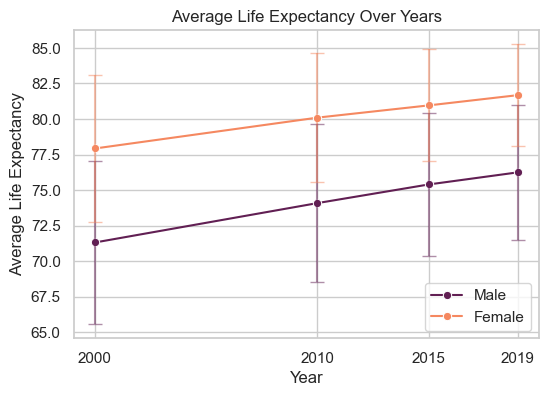

In [20]:
# Plotting the groupby output onto a graph

# Reshaping the data for plotting
reshaped_data = avg_life_expect_eur.unstack('Gender')

palette = sns.color_palette("rocket", 7)

# Lineplot showing the average global life expectancy for men and women over the years, with stdev
sns.set(style="whitegrid")
custom_palette = sns.color_palette("rocket", 7)

plt.figure(figsize=(6,4))
sns.lineplot(data=reshaped_data[('mean', 'Male')], marker='o', label='Male', color=palette[1])
sns.lineplot(data=reshaped_data[('mean', 'Female')], marker='o', label='Female', color=palette[5])

plt.errorbar(reshaped_data.index, reshaped_data[('mean', 'Male')],
            yerr=reshaped_data[('std', 'Male')], linestyle='', alpha=0.5, 
             capsize=5, color=palette[1])
plt.errorbar(reshaped_data.index, reshaped_data[('mean', 'Female')],
            yerr=reshaped_data[('std', 'Female')], linestyle='', alpha=0.5, 
             capsize=5, color=palette[5])

plt.xticks(reshaped_data.index)
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy Over Years')
plt.legend()
plt.show()

#### Analysis interpretation:

This analysis revealed that in Europe between 2000 and 2019, on average females were consistently living longer than males. Moreover, for both females and males, the life expectancy increased over this time period, from 77.93 to 81.68 years for females, and from 71.32 to 76.25 this years for males. 

This finding is really interesting and begs the question of why women are living longer. Is this a result of certain life style factors or that men tend to have more dangerous jobs that are causing them to have a shorter lifespan?


### 2) Investigating which European countries had the longest and shortest life expectancies

In [13]:
# Generating a new dataframe using a function to extract the min and max life expectancies for each year

def get_extreme_life_country(year, gender, dataframe, extreme_type):
    filtered_df = europe_df2[(europe_df2['Year'] == year) & (europe_df2['Gender'] == gender)]
    
    if extreme_type == 'min':
        extreme_country = filtered_df.loc[filtered_df['Life Expectancy at birth'].idxmin()]
    elif extreme_type == 'max':
        extreme_country = filtered_df.loc[filtered_df['Life Expectancy at birth'].idxmax()]
    else:
        raise ValueError("Invalid 'extreme_type' argument. Use 'min' or 'max'.")
    
    return extreme_country


years = [2000, 2010, 2015, 2019]
genders = ['Male', 'Female']
extreme_types = ['min', 'max']

extreme_countries = []

for year in years:
    for gender in genders:
        for extreme_type in extreme_types:
            country_data = get_extreme_life_country(year, gender, df, extreme_type)
            extreme_countries.append(country_data)

# Creating a new DataFrame to display the results
extreme_countries_df = pd.DataFrame(extreme_countries, columns=['Year', 'Gender', 'Life Expectancy at birth', 'Country'])
extreme_countries_df = extreme_countries_df.set_index(['Year', 'Gender'])
extreme_countries_df = extreme_countries_df.rename(columns={'Life Expectancy at birth': 'Life Expectancy - Min and Max'})
extreme_countries_df

Life Expectancy - Min and Max      Country
Year Gender                                            
2000 Male                            48.94      Czechia
     Male                            77.74      Iceland
     Female                          52.31      Czechia
     Female                          82.52       France
2010 Male                            54.81      Czechia
     Male                            80.03  Switzerland
     Female                          58.94      Czechia
     Female                          84.58        Spain
2015 Male                            57.98      Czechia
     Male                            80.69      Iceland
     Female                          62.96      Czechia
     Female                          84.94        Spain
2019 Male                            60.53      Czechia
     Male                            81.75  Switzerland
     Female                          65.81      Czechia
     Female                          85.68        Spain

#### Analysis interpretation:
Czechia consistently had the lowest life expectancies for males and females over this period of time. 
Why is this? Is this a reflection of the Czech healthcare system at this time?

Spain had the highest life expectancy for females in 2010, 2015 and 2019, with France having a higher life expectancy for females in 2000. The highest life expectancies for males alternated between Iceland and Switzerland in these years.

It would be interesting to investigate why the life expectancies were higher in these countries. Is this a reflection of lifestyle factors, such as diet and exercise, or healthcare systems?

### Choropleth map to compare the average life expectancies between European countries

In [21]:
# Rendering the figures in the browser instead of in the notebook
pio.renderers.default = 'browser'

In [22]:
# Making a new dataframe that groups the data by country and year, and averages the Life Expectancy data for men and women
avg_life_expect_group = europe_df2.groupby(['Year', 'Country', 'id'])['Life Expectancy at birth'].agg('mean')

avg_life_expect = avg_life_expect_group.reset_index()
avg_life_expect.sort_values(by=['Year'], ascending=True, inplace=True)

In [50]:
# Finding the min and max values to set the ranges
min_value = avg_life_expect['Life Expectancy at birth'].min()
max_value = avg_life_expect['Life Expectancy at birth'].max()

# Constructing the map for average life expectancy at birth
map1 = px.choropleth(avg_life_expect, 
                     locations='id', 
                     geojson=europe, 
                     color='Life Expectancy at birth', 
                     scope='europe',
                     animation_frame='Year',
                     color_continuous_scale=px.colors.sequential.Sunset,
                     range_color=(min_value, max_value),  
                     hover_name='Country',
                     hover_data='Life Expectancy at birth')
map1.update_layout(coloraxis_colorbar_title='Average Life Expectancy at Birth',
                  title_text='Average European Life Expectancy at Birth')

map1.update_traces(hovertemplate='%{hovertext}<br>Life expectancy at birth: %{z:.2f}')

map1.update_geos(fitbounds='locations', visible=False)
map1.show()

#### Analysis interpretation:

The choropleth map clearly visualises that, according to this dataset, Czechia had much lower life expectancies than the other countries in these years. The map also revealed that whilst average life expectancy increased over time, countries in Western Europe consistently trended towards have higher life expectancies than countries in Eastern Europe. Again, it would be interesting to investigate which factors caused this result - lifestyle, nutruition, exercise, healthcare?

### Investigating the most common causes of death in Europe for men and women
I will just focus on 2019 for this analysis, the most recent year in the dataset.

In [24]:
# Copies of the dataframe for year 2019 and for female and male data
europe_fem = europe_df[(europe_df['Year'] == 2019) & (europe_df['Gender'] == 'Female')]
europe_male = europe_df[(europe_df['Year'] == 2019) & (europe_df['Gender'] == 'Male')]

In [25]:
# Dropping the columns that are not needed for the pie chart
europe_fem.drop(['Country', 'Year', 'Life Expectancy at birth', 'Gender', 'Alcohol'], axis=1, inplace=True)
europe_male.drop(['Country', 'Year', 'Life Expectancy at birth', 'Gender', 'Alcohol'], axis=1, inplace=True)

In [26]:
# Aggregating and summing the data for each cause of death, making into a new dataframe
europe_fem_sum = europe_fem.agg('sum').reset_index(name='Total Estimated Deaths, number per 1000')
europe_fem_sum.rename(columns = {'index':'Causes of Death'}, inplace = True)
europe_fem_sum

,Causes of Death,"Total Estimated Deaths, number per 1000"
0,Tuberculosis,2.61177
1,Syphilis,0.039403
2,Chlamydia,0.007065
3,Gonorrhoea,0.023966
4,Trichomoniasis,0
5,Genital herpes,0
6,Other STDs,0.227509
7,HIV/AIDS,3.117956
8,Diarrhoeal diseases,8.655766
9,Whooping cough,0.017096


In [28]:
# Converting the column to a numeric data type, and set errors='coerce' to handle non-numeric values
europe_fem_sum['Total Estimated Deaths, number per 1000'] = pd.to_numeric(europe_fem_sum['Total Estimated Deaths, number per 1000'], errors='coerce')

# Sorting and getting the top 20 causes of death
eur_fem_sum_head = europe_fem_sum.sort_values(by=['Total Estimated Deaths, number per 1000'], ascending=False).head(20)

# Creating a pie chart
pie1 = px.pie(data_frame=eur_fem_sum_head, values='Total Estimated Deaths, number per 1000', names='Causes of Death', title='Causes of Death for Females in Europe in 2019')
pie1.show()

In [29]:
# Repeating the process for the male data
# Aggregating and summing the data for each cause of death, making into a new dataframe
europe_male_sum = europe_male.agg('sum').reset_index(name='Total Estimated Deaths, number per 1000')
europe_male_sum.rename(columns = {'index':'Causes of Death'}, inplace = True)

In [30]:
# Converting the column to a numeric data type, and set errors='coerce' to handle non-numeric values
europe_male_sum['Total Estimated Deaths, number per 1000'] = pd.to_numeric(europe_male_sum['Total Estimated Deaths, number per 1000'], errors='coerce')

# Sorting and getting the top 20 causes of death
eur_male_sum_head = europe_male_sum.sort_values(by=['Total Estimated Deaths, number per 1000'], ascending=False).head(20)

# Creating a pie chart
pie2 = px.pie(data_frame=eur_male_sum_head, values='Total Estimated Deaths, number per 1000', names='Causes of Death', title='Causes of Death for Males in Europe in 2019')
pie2.show()

#### Analysis interpretation:
The analysis revealed that ischaemic heart disease and stroke were the two most common causes of death for both males and females in Europe in 2019. 

For females, the next two most common causes of death were Alzheimer's disease and other dementias and other circulatory diseases. Whereas for males, these diseases were the fifth and sixth most common causes of death, whilst trachea, bronchus and lung cancers, and chronic pulmonary disease were the third and fourth. This reveals that lung diseases were more common causes of death for men in 2019. A likely cause of this difference is that men tend to smoke more than women, as visualised here: https://ourworldindata.org/who-smokes-more-men-or-women

The results of this analysis are interesting as they reveal that diseases in the vascular system are highly prevalent causes of death in Europe. Ischaemic heart disease, stroke, Alzheimer's disease and other types of dementia, and other circulatory diseases are all related conditions. For example, having a stroke greatly increases your chances of developing Alzheimer's disease (the subject of my neuroscience PhD).

The rest of the analysis will focus on the vascular-related diseases that resulted in high estimated numbers of death: ischaemic heart disease, stroke, Alzheimer's disease and other dementias, and other circulatory diseases. I will produce choropleth maps to compare the relative death rates caused by these diseases among Europeon countries.

In [32]:
# Making a new dataframe that just focuses on the vascular-related diseases
vas_dis_df = europe_df[['Country','id', 'Year', 'Ischaemic heart disease', 'Stroke', 'Alzheimer disease and other dementias', 'Other circulatory diseases', 'Life Expectancy at birth']].copy()
vas_dis_df.head(1)

,Country,id,Year,Ischaemic heart disease,Stroke,Alzheimer disease and other dementias,Other circulatory diseases,Life Expectancy at birth
8,Albania,AL,2019,4.023249,3.449557,0.505758,0.413641,76.25


In [36]:
# Groupby to calculate the average number of deaths from male and female data, for each country and year
vas_dis_df_avg = vas_dis_df.groupby(['Year', 'Country','id']).mean()
vas_dis_df_avg.reset_index(inplace=True)

### Choropleth map visualising deaths caused by ischaemic heart disease in Europe

In [46]:
# Finding the min and max values to set the ranges
min_value = vas_dis_df_avg['Ischaemic heart disease'].min()
max_value = vas_dis_df_avg['Ischaemic heart disease'].max()

map2 = px.choropleth(vas_dis_df_avg, locations='id', 
                    geojson=europe, 
                    color='Ischaemic heart disease', 
                    scope='europe',
                    animation_frame = 'Year',
                    color_continuous_scale=px.colors.sequential.Sunset,
                    range_color=(min_value, max_value),
                    hover_name='Country',
                    hover_data='Ischaemic heart disease'
                    )
map2.update_layout(coloraxis_colorbar_title='Average Number of Deaths <br>due to Ischaemic Heart Disease<br>(number of deaths per 1000)',
                  title_text = 'European Estimated Death Rate due to Ischaemic Heart Disease')
map2.update_traces(hovertemplate='%{hovertext}<br>Estimated Death Rate: %{z:.2f} deaths per 1000')
map2.update_geos(fitbounds='locations', visible=False)
map2.show()

#### Analysis interpretation

The choropleth map visualising the average number of deaths due to ischaemic heart disease showed that in 2000 the Ukraine, Germany and the United Kingdom were the countries with the highest deaths due to this condition, followed by Italy and Poland. The Nordic, Baltic, and Balkan countries and Ireland had the lowest deaths due to ischaemic heart disease. 

Ukraine had the highest average number of deaths as a result of ischaemic heart disease, in all four years. Interestingly, for the UK, Germany, Italy and Poland, ischaemic heart disease deaths decreased between 2000 and 2015, but increased again in 2019.

### Choropleth map visualising deaths caused by stroke in Europe

In [47]:
# Finding the min and max values to set the ranges
min_value = vas_dis_df_avg['Stroke'].min()
max_value = vas_dis_df_avg['Stroke'].max()

map3 = px.choropleth(vas_dis_df_avg, locations='id', 
                    geojson=europe, 
                    color='Stroke', 
                    scope='europe',
                    animation_frame = 'Year',
                    color_continuous_scale=px.colors.sequential.Sunset,
                    range_color=(min_value, max_value),
                    hover_name='Country',
                    hover_data='Stroke'
                    )
map3.update_layout(coloraxis_colorbar_title='Average Number of Deaths <br>due to Stroke<br>(number of deaths per 1000)',
                  title_text = 'European Estimated Death Rate due to Stroke')
map3.update_traces(hovertemplate='%{hovertext}<br>Estimated Death Rate: %{z:.2f} deaths per 1000')
map3.update_geos(fitbounds='locations', visible=False)
map3.show()

#### Analysis interpretation

The choropleth map showing the average number of deaths caused by stroke strongly resembled that of ischaemic heart disease. Ukraine had the highest average number of deaths, followed by Germany, Italy, UK, Romania and Poland. Lower death rates due to stroke were observed in the Nordic, Baltic, and Balkan countries, Ireland, Switerland and Slovakia. 

There appears to be a trend of reduced deaths caused by stroke in 2010 and 2019, but these seem to be elevated in 2015. This is interesting, as there seemed to be a reduction in deaths due to ischaemic heart disease in 2015. This may result may reflect the close relationship between these diseases and how both could be present in some people, as stroke can increase risk of heart disease and vice versa. Maybe in 2015 more people died of stroke instead of dying from ischaemic heart disease.

### Choropleth map visualising deaths caused by Alzheimer's disease and other dementias in Europe

In [48]:
# Finding the min and max values to set the ranges
min_value = vas_dis_df_avg['Alzheimer disease and other dementias'].min()
max_value = vas_dis_df_avg['Alzheimer disease and other dementias'].max()

map4 = px.choropleth(vas_dis_df_avg, locations='id', 
                    geojson=europe, 
                    color='Alzheimer disease and other dementias', 
                    scope='europe',
                    animation_frame = 'Year',
                    color_continuous_scale=px.colors.sequential.Sunset,
                    range_color=(min_value, max_value),
                    hover_name='Country',
                    hover_data='Alzheimer disease and other dementias'
                    )
map4.update_layout(coloraxis_colorbar_title='Average Number of Deaths <br>due to Dementia<br>(number of deaths per 1000)',
                  title_text = 'European Estimated Death Rate due to Alzheimer diseases and Other Dementias')
map4.update_traces(hovertemplate='%{hovertext}<br>Estimated Death Rate: %{z:.2f} deaths per 1000')
map4.update_geos(fitbounds='locations', visible=False)
map4.show()

#### Analysis interpretation

The choropleth map showing the average number of deaths caused by Alzheimer's disease and other dementias showed that in 2000, France, Spain, UK, and Italy were the countries with the highest death rates due to dementia, with the Nordic and Eastern European countries (apart from Ukraine) having the lowest death rates. The hue of the countries on the map is fairly consistent, indicating that the differences in death rates between countries in 2000 was quite small. However, in the proceeding years, France, Spain, Italy, Germany and especially the UK, had a noticeable increase in the dementia death rate. This is very interesting, as it indicates that dementia is especially prevalent in large Western European countries, and that the rates of dementia deaths have been increasing over time.

### Choropleth map visualising deaths caused by other circulatory diseases in Europe

In [49]:
# Finding the min and max values to set the ranges
min_value = vas_dis_df_avg['Other circulatory diseases'].min()
max_value = vas_dis_df_avg['Other circulatory diseases'].max()

map5 = px.choropleth(vas_dis_df_avg, locations='id', 
                    geojson=europe, 
                    color='Other circulatory diseases', 
                    scope='europe',
                    animation_frame = 'Year',
                    color_continuous_scale=px.colors.sequential.Sunset,
                    range_color=(min_value, max_value),
                    hover_name='Country',
                    hover_data='Other circulatory diseases'
                    )
map5.update_layout(coloraxis_colorbar_title='Average Number of Deaths <br>due to Other Circulatory Diseases<br>(number of deaths per 1000)',
                  title_text = 'European Estimated Death Rate due to Other Circulatory Diseases')
map5.update_traces(hovertemplate='%{hovertext}<br>Estimated Death Rate: %{z:.2f} deaths per 1000')
map5.update_geos(fitbounds='locations', visible=False)
map5.show()

#### Analysis interpretation

The choropleth map of the average number of deaths due to other circulatory diseases showed that the death rates resulting from these conditions were particularly high in Germany, France, UK, Italy and Spain, in 2000 to 2019. Similarly to the map showing the dementia death rate, this revealed that circulatory diseases were causing higher numbers of deaths in big Western European countries. The dataset uses the vague term 'other circulatory diseases', so it is unclear which diseases this refers to. However, diseases of the circulatory system are risk factors for developing dementia, which may be why the countries with high death rate due to these diseases overlap with countries with high dementia death rate.

#### Closing Comments

The choropleth maps were helpful for visualising the life expectancies of different European countries, and which countries that have high and low death rates caused by these prevalent vascular diseases, and how these changed over time. For all four causes of death, the United Kingdom, Germany, Italy and Spain consistently seemed to have among the largest numbers of death. Whereas Ukraine and Poland had high death rates for ischaemic heart disease and stroke, there numbers were lower for Alzheimer's disease, other dementias and other circulatory diseases. Another interesting finding in this analysis was the trend of Western European countries having longer life expectancies than in Eastern European countries, which was maintained at every year in the dataset. This is really interesting and deserves further investigation. Moreoever, the Nordic countries consistently had lower death rates due to these vascular diseases and longer life expectancies. It would be important to determine why this is, as it could help other countries improve the health and lives of their citizens.

Ischaemic heart disease and stroke are risk factors for developing Alzheimer's disease and other forms of dementia. People who survive having a stroke or heart disease are more likely to develop dementia as they age. Therefore, the data may reflect a trend towards more people dying from stroke and ischaemic heart attack in some countries where the life expectancy is lower, such as Ukraine. Whereas in other countries, such as UK, France, Germany, Spain and Italy, where the number of death due to dementia were elevated, may reflect more people surviving having a stroke or heart disease, but later developing dementia. 

#### Future Investigation

The purpose of this project was to build visualisations to display the life expectancies and estimated number of deaths from different European countries, to enable visual comparisons between countries. The analysis raises further questions that could be explored with this dataset, as well as seeking out additional datasets to help with the investigation.
* Why is there a trend of longer life expectancies in Western Europe compared to Eastern Europe? Is this a statistical difference?
* Which causes of death have the most influence on the life expectancies for each country? This is especially interesting for the Balkan countries, which have lower life expectancies but also lower death rates due to these vascular diseases. Which other causes of death are prevalent here?
* What factors (e.g. lifestyle, environment, healthcare) influence high numbers of death due to vascular-related diseases? How do they differ between European countries? 
* How many people develop these diseases versus how many people die from them in different countries? How effective are the treatments and healthcare offered to these patients by different European countries?